### Load the data

In [27]:
import pandas as pd

df = pd.read_csv('data/us-insurance-data.csv')

### Check for missing values

In [28]:
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


### Handle missing values

In [29]:
from sklearn.impute import SimpleImputer

# For numerical columns, fill missing values with the median
numerical_cols = ['age', 'bmi', 'children']
numerical_imputer = SimpleImputer(strategy='median')
df[numerical_cols] = numerical_imputer.fit_transform(df[numerical_cols])

### Convert categorical variables into numerical variables

In [30]:
categorical_cols = ['sex', 'smoker', 'region']
df.dropna(subset=categorical_cols, inplace=True)

# Drop rows where 'charges' is NaN
df.dropna(subset=['charges'], inplace=True)

# Verify that missing values have been handled
print("\nMissing values after handling missing values:")
print(df.isnull().sum())


Missing values after handling missing values:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


### Plot the distribution of charges

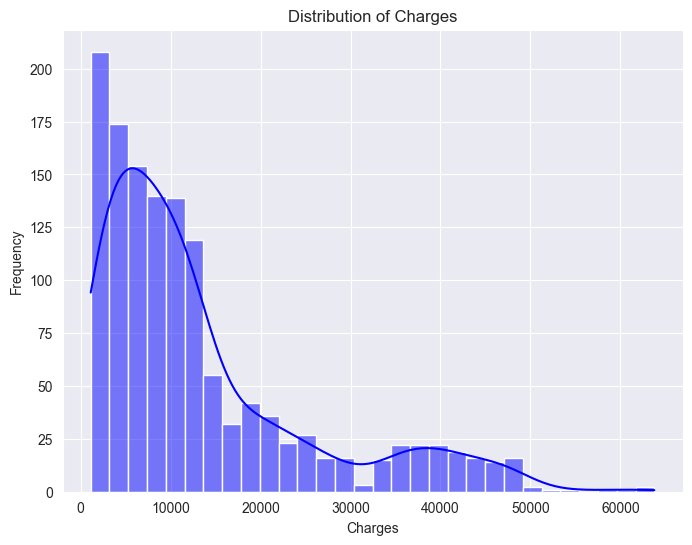

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.histplot(df['charges'], kde=True, color='blue')
plt.title('Distribution of Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

### Box plot of charges by smoker status

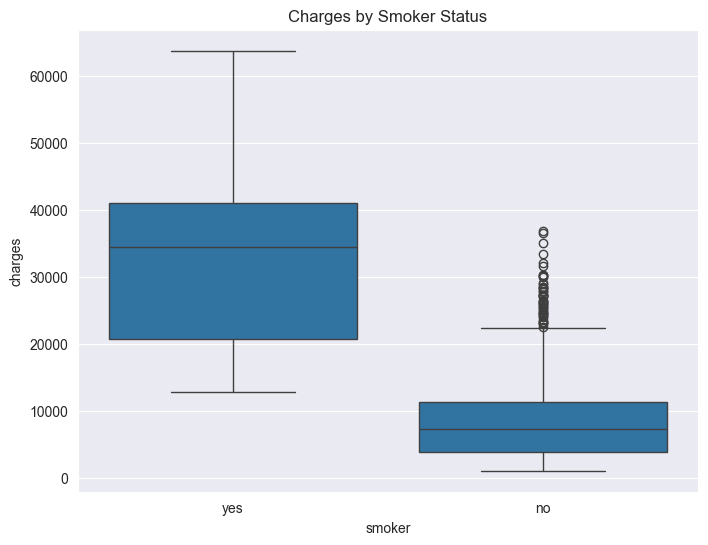

In [32]:
plt.figure(figsize=(8,6))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Charges by Smoker Status')
plt.show()

### Check the correlation heatmap (using only numerical columns)

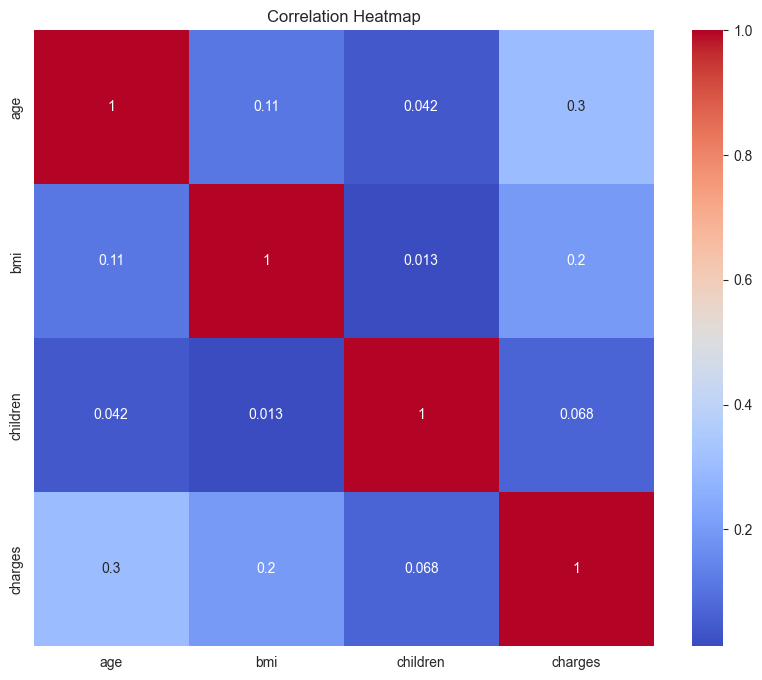

In [33]:
plt.figure(figsize=(10,8))
numeric_cols = df.select_dtypes(include=['number']).columns
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Separate features and target variable

In [34]:
X = df.drop('charges', axis=1)
y = df['charges']

### Prepare the data for modeling

In [35]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Define categorical and numerical columns
categorical_cols = ['sex', 'smoker', 'region']
numerical_cols = ['age', 'bmi', 'children']

# Create the ColumnTransformer with OneHotEncoder and StandardScaler
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Fit and transform the features
X_preprocessed = preprocessor.fit_transform(X)

# Get feature names after encoding
num_features = numerical_cols
cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
feature_names = num_features + list(cat_features)

# Convert the preprocessed features to a DataFrame
X_preprocessed_df = pd.DataFrame(X_preprocessed, columns=feature_names)

### Split the data into training and testing sets

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_preprocessed_df, y, test_size=0.2, random_state=42)

### Build and train the Linear Regression model

In [37]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)

### Calculate evaluation metrics

In [40]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)

print('\nModel Evaluation Metrics:')
print('Mean Absolute Error (MAE):', round(mae, 2))
print('Mean Squared Error (MSE):', round(mse, 2))
print('Root Mean Squared Error (RMSE):', round(rmse, 2))
print('R2 Score:', round(r_squared, 4))


Model Evaluation Metrics:
Mean Absolute Error (MAE): 4176.96
Mean Squared Error (MSE): 33568529.3
Root Mean Squared Error (RMSE): 5793.84
R2 Score: 0.7838


### Plot predicted vs actual charges

In [41]:
from sklearn.model_selection import cross_val_score, KFold

k = 5  # You can choose the number of folds (e.g., 5 or 10)
kfold = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform cross-validation and compute evaluation metrics
cv_results = cross_val_score(model, X_preprocessed, y, cv=kfold, scoring='neg_mean_absolute_error')

# Convert scores to positive values
mae_scores = -cv_results

print(f"Cross-Validation MAE Scores: {mae_scores}")
print(f"Average MAE: {mae_scores.mean():.2f}")
print(f"Standard Deviation of MAE: {mae_scores.std():.2f}")

Cross-Validation MAE Scores: [4181.19447375 4242.77953507 4111.04308724 4427.93351222 4054.10990475]
Average MAE: 4203.41
Standard Deviation of MAE: 129.06


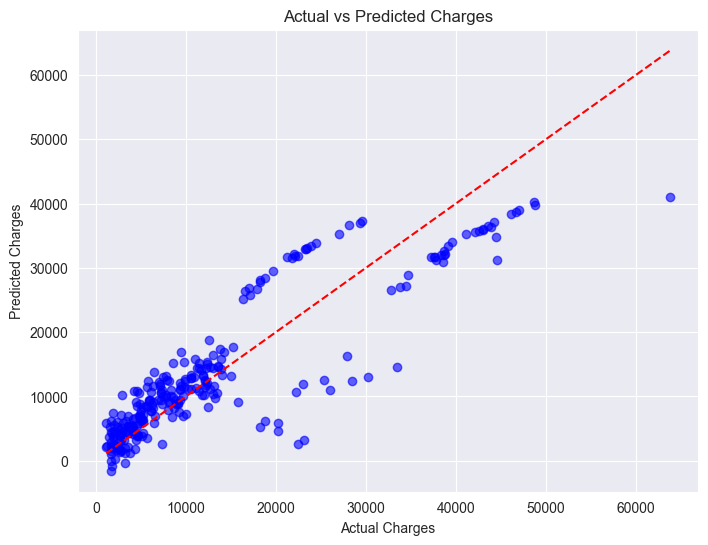

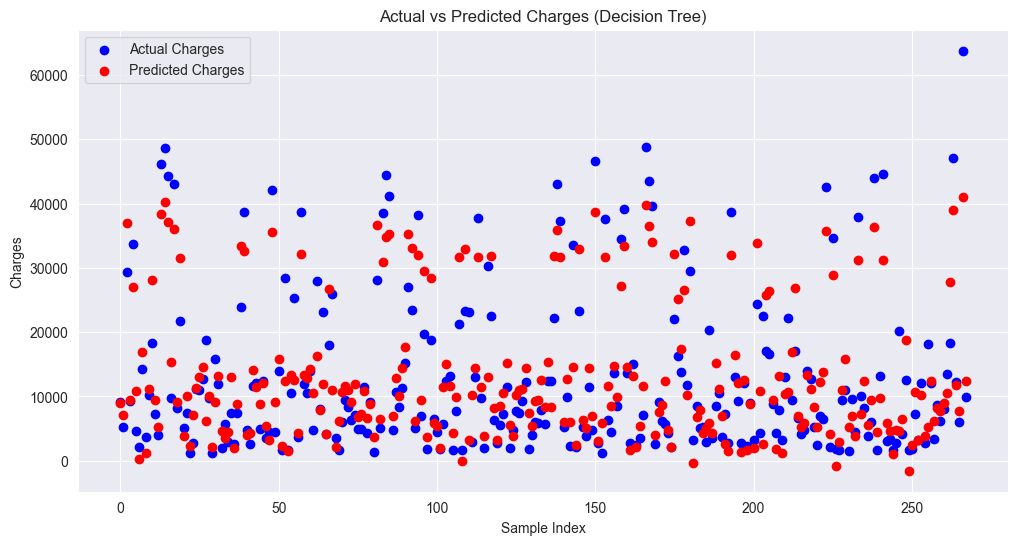

In [39]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges')
plt.show()

###

y_test = y_test.reset_index(drop=True)
y_pred_best_dt = pd.Series(y_pred)

plt.figure(figsize=(12, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Charges')
plt.scatter(range(len(y_pred_best_dt)), y_pred_best_dt, color='red', label='Predicted Charges')
plt.xlabel('Sample Index')
plt.ylabel('Charges')
plt.title('Actual vs Predicted Charges (Decision Tree)')
plt.legend()
plt.show()